In [1]:
'''
Author: Gang Hu
Personal Email: huyingguo2007@hotmail.com
Work/School Email: ghu3@ur.rochester.edu
Date: 2023-08-16 23:54:35
LastEditTime: 2023-08-16 23:55:12
LastEditors: Gang Hu
FilePath: \Hackathon-Summer-2023\test.ipynb
'''

# Read and load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad


dirpath = 'test_data\sce.h5ad'

# load the data
adata = sc.read_h5ad(dirpath)
len(adata) # row number


21954

Tutorial on scanpy: https://scanpy.readthedocs.io/en/stable/

In [2]:
!ls test_data

sce.h5ad
sce.rds


In [3]:
!pip install leidenalg


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install louvain


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
print(adata)

AnnData object with n_obs × n_vars = 21954 × 25269
    uns: 'X_name'


AnnData object with n_obs × n_vars = 21954 × 25269
    uns: 'X_name'

There are 21954 cells and 25269 gene features in the dataset.

In [4]:
adata.var

""
A1BG
A1BG-AS1
A1CF
A2M
A2M-AS1
...
hsa-mir-490
hsa-mir-5195
hsa-mir-6080
hsa-mir-8072


In [5]:
adata.obs

""
AGAGCGAAGATCTGCT
ACATCAGTCTGACCTC
TTCTCCTGTCCTGCTT
GAAACTCTCATGTAGC
CAGTCCTGTCTAGCCG
...
TTTATGCTCTTGTACT
ATAACGCCAAGCTGGA
ATTACTCAGTGGACGT
CGTGTCTCAAGCGTAG


In [6]:
adata.X


<21954x25269 sparse matrix of type '<class 'numpy.float64'>'
	with 11039225 stored elements in Compressed Sparse Column format>

In [7]:
print(adata.uns['X_name'])


counts


In [8]:
print(adata.uns.keys())


dict_keys(['X_name'])


In [9]:
print(adata.shape)

(21954, 25269)


In [10]:
print(adata.filename)

None


In [11]:
print(adata.var[:20])

Empty DataFrame
Columns: []
Index: [A1BG, A1BG-AS1, A1CF, A2M, A2M-AS1, A2ML1, A4GALT, AA415398, AA465934, AA467197, AA474331, AA474408, AA987161, AAAS, AACS, AADAT, AAED1, AAGAB, AAK1, AAMDC]


In [12]:
df = pd.DataFrame(adata.X)
print(df.head())


                                                   0
0    (0, 14)\t1.0\n  (0, 16)\t2.0\n  (0, 17)\t2.0...
1    (0, 4)\t1.0\n  (0, 13)\t1.0\n  (0, 16)\t5.0\...
2    (0, 4)\t1.0\n  (0, 13)\t3.0\n  (0, 16)\t6.0\...
3    (0, 13)\t1.0\n  (0, 15)\t1.0\n  (0, 17)\t1.0...
4    (0, 13)\t3.0\n  (0, 15)\t1.0\n  (0, 16)\t3.0...


In [78]:
expression_matrix = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X

df = pd.DataFrame(expression_matrix, index=adata.obs.index, columns=adata.var.index)

print(df)

                  A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1  A2ML1  A4GALT  AA415398  \
AGAGCGAAGATCTGCT   0.0       0.0   0.0  0.0      0.0    0.0     0.0       0.0   
ACATCAGTCTGACCTC   0.0       0.0   0.0  0.0      1.0    0.0     0.0       0.0   
TTCTCCTGTCCTGCTT   0.0       0.0   0.0  0.0      1.0    0.0     0.0       0.0   
GAAACTCTCATGTAGC   0.0       0.0   0.0  0.0      0.0    0.0     0.0       0.0   
CAGTCCTGTCTAGCCG   0.0       0.0   0.0  0.0      0.0    0.0     0.0       0.0   
...                ...       ...   ...  ...      ...    ...     ...       ...   
TTTATGCTCTTGTACT   0.0       0.0   0.0  0.0      0.0    0.0     0.0       0.0   
ATAACGCCAAGCTGGA   0.0       0.0   0.0  0.0      0.0    0.0     0.0       0.0   
ATTACTCAGTGGACGT   0.0       0.0   0.0  0.0      0.0    0.0     0.0       0.0   
CGTGTCTCAAGCGTAG   0.0       0.0   0.0  0.0      0.0    0.0     0.0       0.0   
CCGGGATCAATCGGTT   0.0       0.0   0.0  0.0      0.0    0.0     0.0       0.0   

                  AA465934 

In [79]:
df

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,AA415398,AA465934,AA467197,...,hsa-mir-3181,hsa-mir-335,hsa-mir-4259,hsa-mir-4537,hsa-mir-4538,hsa-mir-490,hsa-mir-5195,hsa-mir-6080,hsa-mir-8072,snoU2-30
AGAGCGAAGATCTGCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
ACATCAGTCTGACCTC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
TTCTCCTGTCCTGCTT,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
GAAACTCTCATGTAGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
CAGTCCTGTCTAGCCG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCTCTTGTACT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATAACGCCAAGCTGGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATTACTCAGTGGACGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGTGTCTCAAGCGTAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21954 entries, AGAGCGAAGATCTGCT to CCGGGATCAATCGGTT
Columns: 25269 entries, A1BG to snoU2-30
dtypes: float64(25269)
memory usage: 4.1+ GB


In [77]:
df.describe()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,AA415398,AA465934,AA467197,...,hsa-mir-3181,hsa-mir-335,hsa-mir-4259,hsa-mir-4537,hsa-mir-4538,hsa-mir-490,hsa-mir-5195,hsa-mir-6080,hsa-mir-8072,snoU2-30
count,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,...,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000
mean,0.001685,0.005512,0.000046,0.001139,0.014849,0.000228,0.002277,0.000091,0.000273,0.000228,...,0.000273,0.000091,0.000091,0.000046,0.000182,0.000046,0.001275,0.003553,0.015669,0.000592
std,0.041019,0.080520,0.006749,0.033727,0.125026,0.015090,0.049544,0.009544,0.016530,0.015090,...,0.016530,0.009544,0.009544,0.006749,0.013497,0.006749,0.035691,0.061013,0.139728,0.024327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000


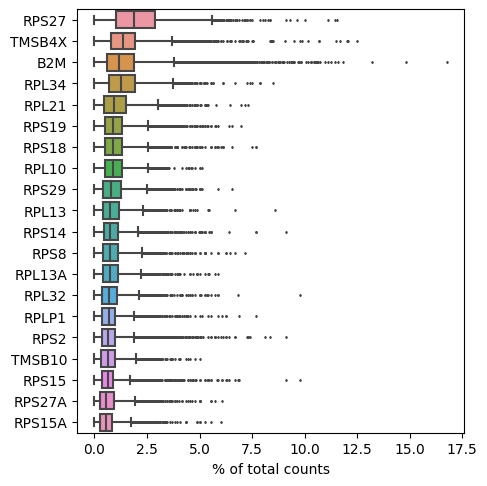

In [17]:
sc.pl.highest_expr_genes(adata, n_top=20)

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A4GALT',
       'AA415398', 'AA465934', 'AA467197',
       ...
       'hsa-mir-3181', 'hsa-mir-335', 'hsa-mir-4259', 'hsa-mir-4537',
       'hsa-mir-4538', 'hsa-mir-490', 'hsa-mir-5195', 'hsa-mir-6080',
       'hsa-mir-8072', 'snoU2-30'],
      dtype='object', length=25269)

In [28]:
training = pd.read_csv('train/training.csv', names=['UMI', 'Binary'])
training

,UMI,Binary
0,GCTCTGTCAATGGATA,1
1,GATGAGGGTACGAAAT,0
2,AGGCCACGTACAGCAG,0
3,ACGCCGAGTCACACGC,0
4,TCTTCGGAGGCTAGCA,0
...,...,...
995,ACTGCTCCACTCGACG,0
996,TGGTTAGGTAAACGCG,0
997,TTCTCAATCAGTACGT,1
998,TGAGCCGGTCTCTTAT,0


In [33]:
training['UMI']

0      GCTCTGTCAATGGATA
1      GATGAGGGTACGAAAT
2      AGGCCACGTACAGCAG
3      ACGCCGAGTCACACGC
4      TCTTCGGAGGCTAGCA
             ...       
995    ACTGCTCCACTCGACG
996    TGGTTAGGTAAACGCG
997    TTCTCAATCAGTACGT
998    TGAGCCGGTCTCTTAT
999    AGGTCCGTCCATGCTC
Name: UMI, Length: 1000, dtype: object

In [39]:
df = df.reset_index(names='UMI')
df

,UMI,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,AA415398,AA465934,...,hsa-mir-3181,hsa-mir-335,hsa-mir-4259,hsa-mir-4537,hsa-mir-4538,hsa-mir-490,hsa-mir-5195,hsa-mir-6080,hsa-mir-8072,snoU2-30
0,AGAGCGAAGATCTGCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,ACATCAGTCTGACCTC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TTCTCCTGTCCTGCTT,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,GAAACTCTCATGTAGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,CAGTCCTGTCTAGCCG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,TTTATGCTCTTGTACT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21950,ATAACGCCAAGCTGGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21951,ATTACTCAGTGGACGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21952,CGTGTCTCAAGCGTAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
mask = df['UMI'].isin(training['UMI'])
training_count = df[mask]
training_count

,UMI,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,AA415398,AA465934,...,hsa-mir-3181,hsa-mir-335,hsa-mir-4259,hsa-mir-4537,hsa-mir-4538,hsa-mir-490,hsa-mir-5195,hsa-mir-6080,hsa-mir-8072,snoU2-30
7,AAGTCTGAGCGTCTAT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,AGATTGCGTTTGGGCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22,CATGACATCTATCGCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,GTCCTCATCCTTGGTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,AGGCCGTTCACATACG,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21772,GCTTGAACATGCCACG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21834,GGTGAAGCATTTCAGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21849,TGTCCCATCCACGACG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21881,GCGCAGTGTTGTGGAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
training_count = df[mask].reset_index(drop=True).copy()
# reset the index from 0 to n
training_count

,UMI,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,AA415398,AA465934,...,hsa-mir-3181,hsa-mir-335,hsa-mir-4259,hsa-mir-4537,hsa-mir-4538,hsa-mir-490,hsa-mir-5195,hsa-mir-6080,hsa-mir-8072,snoU2-30
0,AAGTCTGAGCGTCTAT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AGATTGCGTTTGGGCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,CATGACATCTATCGCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GTCCTCATCCTTGGTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AGGCCGTTCACATACG,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,GCTTGAACATGCCACG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,GGTGAAGCATTTCAGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,TGTCCCATCCACGACG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,GCGCAGTGTTGTGGAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
training_count['Binary'] = training['Binary'].reset_index(drop=True)
# Add Binary column from training to training_count
training_count

,UMI,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,AA415398,AA465934,...,hsa-mir-335,hsa-mir-4259,hsa-mir-4537,hsa-mir-4538,hsa-mir-490,hsa-mir-5195,hsa-mir-6080,hsa-mir-8072,snoU2-30,Binary
0,AAGTCTGAGCGTCTAT,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,AGATTGCGTTTGGGCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,CATGACATCTATCGCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,GTCCTCATCCTTGGTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,AGGCCGTTCACATACG,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,GCTTGAACATGCCACG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996,GGTGAAGCATTTCAGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
997,TGTCCCATCCACGACG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
998,GCGCAGTGTTGTGGAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef, accuracy_score

X = training_count.drop(['UMI', 'Binary'], axis=1)
y = training_count['Binary']

# First split into train and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Second split temp into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


In [73]:
# Initiatize the random forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_val_pred = clf.predict(X_val)


# Evaluation
accuracy = accuracy_score(y_val, y_val_pred)
mcc = matthews_corrcoef(y_val, y_val_pred)


print(f"Accuracy on validation set: {accuracy*100:.2f}%")
print(f"Matthews Correlation Coefficient (MCC) on validation set: {mcc:.3f}")

Accuracy on validation set: 85.24%
Matthews Correlation Coefficient (MCC) on validation set: 0.045


Logistic regression

In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, penalty='l2', max_iter=5000)

log_reg.fit(X_train, y_train)

y_val_pred = log_reg.predict(X_val)


accuracy = accuracy_score(y_val, y_val_pred)
mcc = matthews_corrcoef(y_val, y_val_pred)

print(f"Accuracy on validation set with Logistic Regression: {accuracy*100:.2f}%")
print(f"Matthews Correlation Coefficient (MCC) with Logistic Regression: {mcc:.3f}")

Accuracy on validation set with Logistic Regression: 79.52%
Matthews Correlation Coefficient (MCC) with Logistic Regression: 0.043


In [75]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000)


voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('gb', gb), ('lr', lr)
], voting='soft')


voting_clf.fit(X_train, y_train)

y_val_pred = voting_clf.predict(X_val)


accuracy = accuracy_score(y_val, y_val_pred)
mcc = matthews_corrcoef(y_val, y_val_pred)
confusion = confusion_matrix(y_val, y_val_pred)
tn, fp, fn, tp = confusion.ravel()


print(f"Accuracy on validation set with Voting Classifier: {accuracy*100:.2f}%")
print(f"Matthews Correlation Coefficient (MCC) with Voting Classifier: {mcc:.3f}")
print(f"Confusion matrix:\nTP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")


Accuracy on validation set with Voting Classifier: 83.33%
Matthews Correlation Coefficient (MCC) with Voting Classifier: 0.040
Confusion matrix:
TP: 2, FP: 8, FN: 27, TN: 173
